In [1]:
! pip install scikit-learn

In [2]:
from models.transformer import TransformerModel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
data_path = './KT4/u1.csv'

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform
0,1565096151269,enter,b3544,NaN,diagnosis,NaN,mobile
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile
2,1565096194904,submit,b3544,NaN,diagnosis,NaN,mobile
3,1565096195001,enter,b3238,NaN,diagnosis,NaN,mobile
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile


In [10]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 808 kB/s eta 0:00:01     |████████████▉                   | 1.3 MB 1.6 MB/s eta 0:00:02
     |████████████████████████████████| 895 kB 2.2 MB/s eta 0:00:01
  Using cached tokenizers-0.10.3-cp39-cp39-macosx_10_11_x86_64.whl (2.2 MB)
  Using cached regex-2021.11.10-cp39-cp39-macosx_10_9_x86_64.whl (288 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


In [5]:
timestamps = data['timestamp']
timestamps

0       1565096151269
1       1565096187972
2       1565096194904
3       1565096195001
4       1565096218682
            ...      
3990    1569647530053
3991    1569647567859
3992    1569647618094
3993    1569647652076
3994    1569647680211
Name: timestamp, Length: 3995, dtype: int64

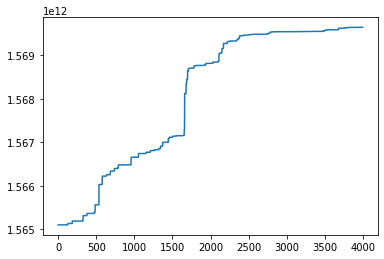

In [6]:
plt.plot(timestamps)

In [7]:
questions = pd.read_csv('./kt4subset/questions.csv')
questions.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


In [8]:
q_timestamps = questions['deployed_at']
q_timestamps.head()

0    1558093217098
1    1558093219720
2    1558093222784
3    1558093225357
4    1558093228439
Name: deployed_at, dtype: int64

In [9]:
subset_question_timestamps = pd.DataFrame()

In [10]:
for ts in timestamps:
    if ts in q_timestamps:
        subset_question_timestamps.add(ts)

In [11]:
subset_question_timestamps

""


In [13]:
import Path

ModuleNotFoundError: No module named 'Path'

In [11]:
def getStudentAnswers(s_data):
    classes = ['action_type', 'item_id', 'user_answer']
    user_answers = pd.DataFrame(columns=classes)
    for idx, row in s_data.iterrows():
        if row['action_type'] == 'respond':
            row = pd.Series([row['action_type'], row['item_id'], row['user_answer']], index=classes)
            user_answers = user_answers.append(row, ignore_index=True)
    return user_answers

In [12]:
total_actions = []
pd_actions = pd.DataFrame()
for filename in Path('./kt4subset/students/').glob('*.csv'):
    s_data = pd.read_csv(filename)
    
    pd_actions = pd_actions.append(s_data['action_type'])

NameError: name 'Path' is not defined

In [43]:
pd_actions.transpose()

,action_type,action_type,action_type,action_type,action_type,action_type,action_type,action_type
0,enter,pay,enter,pay,enter,enter,enter,pay
1,quit,enter,respond,enter,respond,respond,respond,enter
2,enter,respond,submit,respond,submit,submit,submit,respond
3,quit,submit,enter,submit,enter,enter,enter,submit
4,enter,enter,respond,enter,play_audio,respond,respond,enter
...,...,...,...,...,...,...,...,...
612,NaN,play_audio,NaN,NaN,NaN,NaN,NaN,NaN
613,NaN,pause_audio,NaN,NaN,NaN,NaN,NaN,NaN
614,NaN,play_audio,NaN,NaN,NaN,NaN,NaN,NaN
615,NaN,pause_audio,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
user_answers = getStudentAnswers()
user_answers.head()

,action_type,item_id,user_answer
0,respond,q6730,a
1,respond,q206,c
2,respond,q218,b
3,respond,q6722,c
4,respond,q4572,a


In [14]:
from pathlib import Path

In [15]:
total_q = []
student_sr = {}
for filename in Path('./KT4/').glob('*.csv'):
    student = filename.name[:-4]
    student_score = 0
    q_attempted = 0
    s_data = pd.read_csv(filename)
    user_answers = getStudentAnswers(s_data)
    for _, (i, a) in user_answers[['item_id', 'user_answer']].iterrows():
        q_attempted += 1
        q_row = questions.loc[questions['question_id'] == i]
        total_q.append(i)
        if q_row['correct_answer'].item() == a:
            student_score += 1
    student_sr[student] = student_score / q_attempted
    print(f'Student id: {student}')
    print(f'Student score: {student_score}')
    print(f'Questions attempted: {q_attempted}')

Student id: u368142
Student score: 2
Questions attempted: 6
Student id: u712419
Student score: 2
Questions attempted: 6
Student id: u630874
Student score: 3
Questions attempted: 7
Student id: u393496
Student score: 5
Questions attempted: 9
Student id: u457843
Student score: 7
Questions attempted: 13
Student id: u648717
Student score: 2
Questions attempted: 5
Student id: u12812
Student score: 457
Questions attempted: 713
Student id: u297182
Student score: 4
Questions attempted: 8
Student id: u542282
Student score: 1
Questions attempted: 6
Student id: u467980
Student score: 5
Questions attempted: 13
Student id: u753323
Student score: 1
Questions attempted: 4
Student id: u813322
Student score: 3
Questions attempted: 6
Student id: u534314
Student score: 2
Questions attempted: 7
Student id: u448963
Student score: 3
Questions attempted: 7
Student id: u476655
Student score: 2
Questions attempted: 6
Student id: u377062
Student score: 23
Questions attempted: 34
Student id: u329678
Student score

ZeroDivisionError: division by zero

In [17]:
max_score = 0
# total_q = set(total_q)
print(total_q)

['q4672', 'q4672', 'q4778', 'q8156', 'q201', 'q489', 'q1295', 'q959', 'q959', 'q3978', 'q4611', 'q4611', 'q4611', 'q4611', 'q4813', 'q4813', 'q5564', 'q5775', 'q3670', 'q4995', 'q8423', 'q5224', 'q5224', 'q5647', 'q5647', 'q5647', 'q5647', 'q4308', 'q4308', 'q8092', 'q8092', 'q194', 'q131', 'q131', 'q131', 'q11075', 'q8162', 'q8162', 'q8068', 'q10', 'q11094', 'q3', 'q3', 'q8122', 'q8177', 'q11216', 'q8181', 'q8181', 'q3', 'q8096', 'q187', 'q10987', 'q150', 'q150', 'q8102', 'q10', 'q8102', 'q7624', 'q89', 'q11082', 'q111', 'q8165', 'q8165', 'q8089', 'q11172', 'q16', 'q186', 'q8140', 'q8140', 'q11004', 'q11004', 'q8118', 'q8163', 'q59', 'q10977', 'q8103', 'q65', 'q8108', 'q11121', 'q11121', 'q11121', 'q104', 'q8057', 'q8131', 'q11034', 'q11034', 'q19', 'q40', 'q57', 'q11127', 'q135', 'q7', 'q176', 'q11065', 'q121', 'q121', 'q190', 'q166', 'q11144', 'q11144', 'q8168', 'q77', 'q6', 'q11106', 'q11106', 'q11106', 'q22', 'q146', 'q5', 'q11095', 'q9591', 'q9601', 'q6186', 'q6731', 'q4617', 'q3

In [20]:
print(student_sr)

{'u368142': 0.3333333333333333, 'u712419': 0.3333333333333333, 'u630874': 0.42857142857142855, 'u393496': 0.5555555555555556, 'u457843': 0.5384615384615384, 'u648717': 0.4, 'u12812': 0.6409537166900421, 'u297182': 0.5, 'u542282': 0.16666666666666666, 'u467980': 0.38461538461538464, 'u753323': 0.25, 'u813322': 0.5, 'u534314': 0.2857142857142857, 'u448963': 0.42857142857142855, 'u476655': 0.3333333333333333, 'u377062': 0.6764705882352942, 'u329678': 0.3333333333333333, 'u669901': 0.0, 'u683300': 0.7407407407407407, 'u572341': 0.4299182903834067, 'u331037': 0.6470588235294118, 'u430600': 0.16666666666666666, 'u378351': 0.375, 'u656529': 0.29411764705882354, 'u608333': 0.4583333333333333, 'u765691': 0.2857142857142857, 'u3999': 0.756797583081571, 'u732911': 0.5, 'u307585': 0.5, 'u409081': 0.3333333333333333, 'u327655': 0.5, 'u319963': 0.7142857142857143, 'u265314': 0.5, 'u361600': 0.5833333333333334, 'u745541': 0.21428571428571427, 'u5330': 0.7183098591549296, 'u290835': 0.4444444444444444

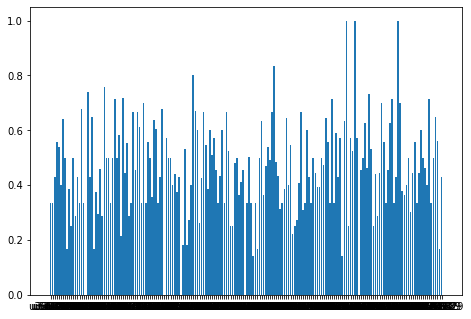

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = student_sr.keys()
success_rates = student_sr.values()
ax.bar(students,success_rates)
plt.show()

Question: if we take just the students with higher than 50% success rate, train the model on them, can we then generate a path that produces more than 50% from students who previously got worse success rates?

In [22]:
sr_df = pd.DataFrame(columns=['student_id', 'success_rate'])
for student, score in student_sr.items():
    if score > 0.5:
        sr_df = sr_df.append({'student_id': student, 'success_rate': score}, ignore_index=True)

In [22]:
sr_df

,student_id,success_rate
0,u393496,0.555556
1,u457843,0.538462
2,u12812,0.640954
3,u377062,0.676471
4,u683300,0.740741
...,...,...
61,u269248,0.555556
62,u443188,0.600000
63,u396288,0.714286
64,u455932,0.647059


In [25]:
feather.write_feather(sr_df, 'best_students.feather')

In [21]:
sr_df = feather.read_feather('best_students.feather')

In [42]:
! pip install feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2453 sha256=3d0318af585f0834b7445fc309c568710dc1b1863c45541017960ae36ec3ac8c
  Stored in directory: /Users/jakubsmekal/Library/Caches/pip/wheels/e3/dc/eb/3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather-format


In [17]:
import pyarrow.feather as feather

In [18]:
read_df = feather.read_feather('KT4_merged.feather')

In [4]:
read_df

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user_id
0,1565096151269,enter,b3544,NaN,diagnosis,,mobile,1
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile,1
2,1565096194904,submit,b3544,NaN,diagnosis,,mobile,1
3,1565096195001,enter,b3238,NaN,diagnosis,,mobile,1
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile,1
...,...,...,...,...,...,...,...,...
131441533,1574241377745,erase_choice,q7454,NaN,sprint,b,mobile,837094
131441534,1574241382243,respond,q7454,NaN,sprint,d,mobile,837094
131441535,1574241397373,submit,b5352,NaN,sprint,,mobile,837094
131441536,1574241397417,enter,e5352,NaN,sprint,,mobile,837094


In [ ]:
columns = ['timestamp','action_type','item_id', 'user_answer', 'user_id']

In [33]:
KT_best = pd.DataFrame()
for _, (student, _) in sr_df.iterrows():
    filename = f'./KT4/{student}.csv'
    s_data = pd.read_csv(filename)
    s_data.insert(0, 'student_id', student)
    KT_best = pd.concat([KT_best, s_data], sort=True)

In [34]:
KT_best

,action_type,cursor_time,item_id,platform,source,student_id,timestamp,user_answer
0,enter,NaN,b4968,web,diagnosis,u393496,1546436679950,NaN
1,respond,NaN,q6436,web,diagnosis,u393496,1546436682665,c
2,submit,NaN,b4968,web,diagnosis,u393496,1546436684011,NaN
3,enter,NaN,b13,web,diagnosis,u393496,1546436686167,NaN
4,play_audio,0.0,b13,web,diagnosis,u393496,1546436700453,NaN
...,...,...,...,...,...,...,...,...
276,enter,NaN,e3578,mobile,sprint,u529345,1552267384168,NaN
277,quit,NaN,e3578,mobile,sprint,u529345,1552267413848,NaN
278,enter,NaN,b2169,mobile,sprint,u529345,1552267413889,NaN
279,respond,NaN,q3637,mobile,sprint,u529345,1552267469023,a


In [35]:
feather.write_feather(KT_best, 'KT_best.feather')

In [36]:
user_answer = {'NaN': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f':6}

In [43]:
kt_num = pd.DataFrame()

In [46]:
kt_num['user_answer'] = [user_answer[a] for a in KT_best['user_answer']]

KeyError: nan

# Data preparation
I am going to only consider these following columns:
- timestamp
- action_type
- item_id
- user_answer

Things to consider:

Timestamps are already integers, but they are quite large, so it would be better if we encoded them based on the difference between each timestamp (since that's more relevant than the precise value)

The following action types may appear: 

`enter`
`respond`
`submit`
`quit`
`erase_choice`
`undo_erase_choice`
`play_audio`
`pause_audio`
`play_video`
`pause_video`
`pay`
`refund`
`enroll_coupon`

These need to be one-hot encoded, similarly the item_id and user_answer.

(perhaps item_id need not be one-hot encoded, but just converted to a number)

In [5]:
action_types = ['enter', 'respond', 'submit', 'quit', 'erase_choice', 'undo_erase_choice', 'play_audio', 'pause_audio', 'play_video', 'pause_video', 'pay', 'refund', 'enroll_coupon']

In [6]:
# checking features
cat = data.select_dtypes(include='O').keys()
# display variabels
cat

Index(['action_type', 'item_id', 'source', 'user_answer', 'platform'], dtype='object')

In [7]:
# creating new df
# setting columns we use
new_df = pd.read_csv(data_path ,usecols=['timestamp','action_type','item_id', 'user_answer']) 
new_df.head()

,timestamp,action_type,item_id,user_answer
0,1537793156353,enter,b5136,NaN
1,1537793163340,respond,q6730,a
2,1537793164960,submit,b5136,NaN
3,1537793166415,enter,b206,NaN
4,1537793182712,respond,q206,c


In [8]:
# unique values in each columns
for x in new_df.columns:
    #prinfting unique values
    print(x ,':', len(new_df[x].unique()))

timestamp : 28
action_type : 3
item_id : 18
user_answer : 5


In [15]:
# finding the top 20 categories
new_df.item_id.value_counts().sort_values(ascending=False).head(20)

b5136     2
b5060     2
b4191     2
q5659     2
b3104     2
b7373     2
b5128     2
b218      2
b2489     2
b206      2
q6528     1
q4572     1
q10022    1
q6730     1
q6722     1
q218      1
q206      1
q3957     1
Name: item_id, dtype: int64

In [16]:
# make list with top 10 variables
top_10 = [x for x in new_df.item_id.value_counts().sort_values(ascending=False).head(10).index]
top_10

['b5136',
 'b5060',
 'b4191',
 'q5659',
 'b3104',
 'b7373',
 'b5128',
 'b218',
 'b2489',
 'b206']

In [21]:
# for all categorical variables we selected
def top_x(df2,variable,top_x_labels):
    for label in top_x_labels:
        df2[variable+'_'+label] = np.where(data[variable]==label,1,0)
    # read the data again
data2 = pd.read_csv(data_path,usecols = ['timestamp','action_type','item_id', 'user_answer'])
    #encode Nighborhood into the 10 most frequent categories
top_x(data2,'action_type',top_10)
# display data
data2.head()

,timestamp,action_type,item_id,user_answer,action_type_b5136,action_type_b5060,action_type_b4191,action_type_q5659,action_type_b3104,action_type_b7373,action_type_b5128,action_type_b218,action_type_b2489,action_type_b206
0,1537793156353,enter,b5136,NaN,0,0,0,0,0,0,0,0,0,0
1,1537793163340,respond,q6730,a,0,0,0,0,0,0,0,0,0,0
2,1537793164960,submit,b5136,NaN,0,0,0,0,0,0,0,0,0,0
3,1537793166415,enter,b206,NaN,0,0,0,0,0,0,0,0,0,0
4,1537793182712,respond,q206,c,0,0,0,0,0,0,0,0,0,0
